<a href="https://colab.research.google.com/github/AjeetSingh02/TimeSeries/blob/master/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [0]:
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [0]:
df = pd.read_csv("/content/heart_rate.csv", parse_dates=["TIMESTAMP"])

In [0]:
df.to_csv("heart_rat_small.csv")

In [0]:
# Taking only one subject ID == 1000001
df = df.iloc[np.where(df["SUBJECT_ID"] == 1000001)[0], :]

In [0]:
drop_cols = ["SUBJECT_ID", "STUDY_ID", "HEART_RATE_1", "ACCURACY"]
df.drop(columns=drop_cols, inplace=True)

df.sort_values(by="TIMESTAMP", inplace=True)
df.reset_index(inplace=True, drop=True)

In [0]:
df.columns = ["ds", "y"]

In [0]:
df['ds'] = df['ds'].dt.tz_localize(None)

In [0]:
df.head()

,ds,y
0,2017-10-01 00:00:00,78
1,2017-10-01 00:01:00,76
2,2017-10-01 00:02:00,74
3,2017-10-01 00:03:00,74
4,2017-10-01 00:04:00,73


In [0]:
df.tail()

,ds,y
11268,2017-10-08 23:55:00,79
11269,2017-10-08 23:56:00,79
11270,2017-10-08 23:57:00,79
11271,2017-10-08 23:58:00,78
11272,2017-10-08 23:59:00,78


In [0]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [0]:
times = pd.date_range('2017-10-09', periods=720, freq='1min')
future = pd.DataFrame({"ds": times})

In [0]:
future.head()

,ds
0,2017-10-09 00:00:00
1,2017-10-09 00:01:00
2,2017-10-09 00:02:00
3,2017-10-09 00:03:00
4,2017-10-09 00:04:00


In [0]:
future.tail()

,ds
715,2017-10-09 11:55:00
716,2017-10-09 11:56:00
717,2017-10-09 11:57:00
718,2017-10-09 11:58:00
719,2017-10-09 11:59:00


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-10-09 00:00:00,73.775371,62.411552,85.437201
1,2017-10-09 00:01:00,73.779068,61.880990,85.047120
2,2017-10-09 00:02:00,73.782836,62.632801,85.485582
3,2017-10-09 00:03:00,73.786671,61.754421,84.605464
4,2017-10-09 00:04:00,73.790570,62.147216,85.395589


In [0]:
forecast.head(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-09,75.27853,62.411552,85.437201,75.27853,75.27853,-1.503159,-1.503159,-1.503159,-1.503159,-1.503159,-1.503159,0.0,0.0,0.0,73.775371


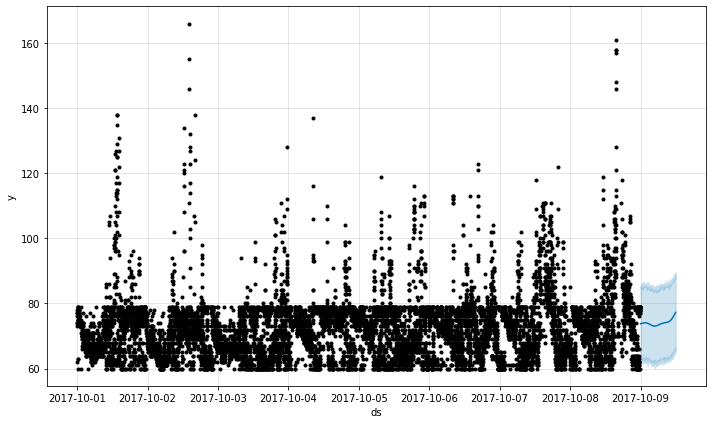

In [0]:
fig1 = m.plot(forecast)

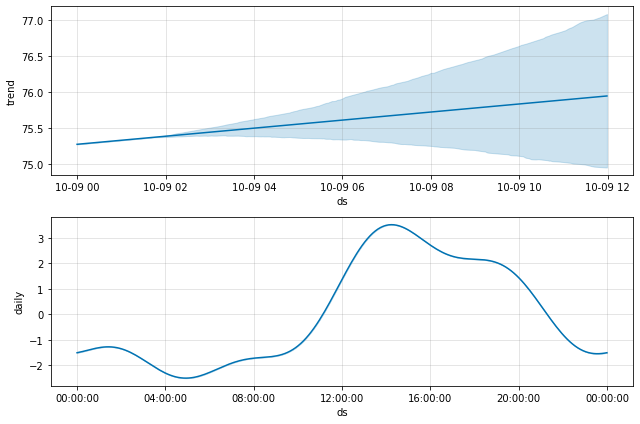

In [0]:
fig2 = m.plot_components(forecast)

In [0]:
future_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [0]:
df = df.set_index("ds")

In [0]:
small_df = df.iloc[-720:,:]

In [0]:
future_df = future_df.set_index("ds")

In [0]:
small_df.head()

,y
ds,
2017-10-08 10:20:00,65
2017-10-08 10:21:00,68
2017-10-08 10:22:00,71
2017-10-08 10:23:00,77
2017-10-08 10:24:00,63


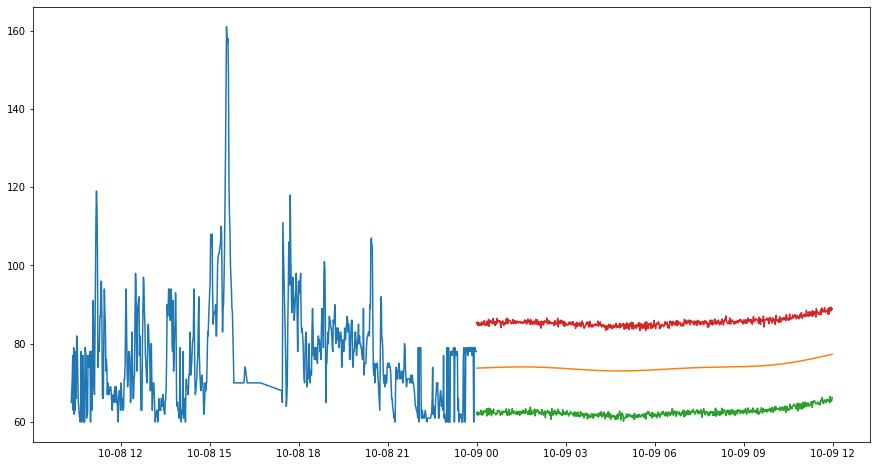

In [0]:
plt.plot(small_df, label='Train')
plt.plot(future_df, label='future')
plt.show()

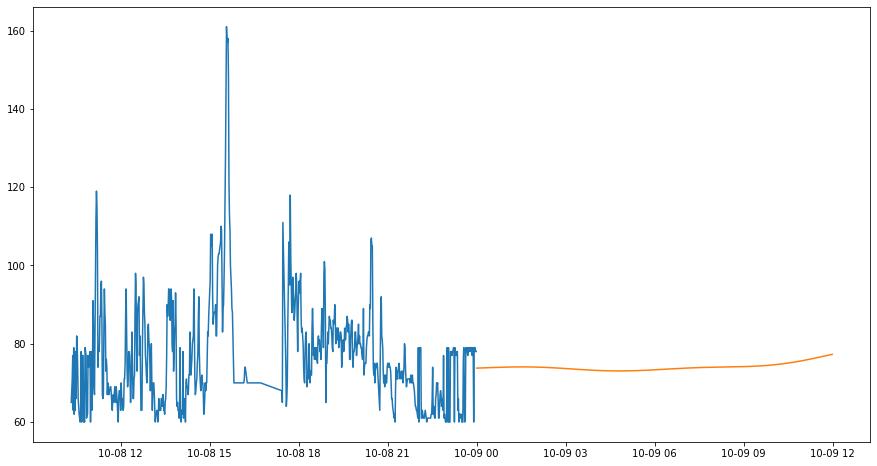

In [0]:
plt.plot(small_df, label='Train')
plt.plot(future_df.iloc[:,0], label='future')
plt.show()

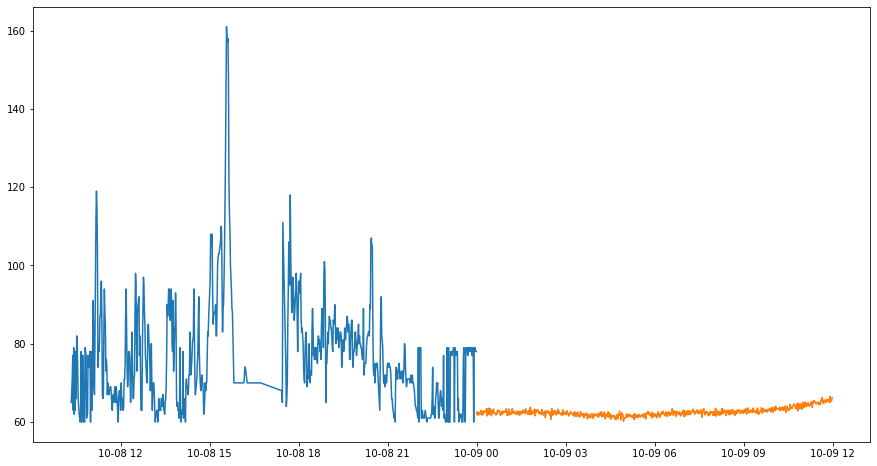

In [0]:
plt.plot(small_df, label='Train')
plt.plot(future_df.iloc[:,1], label='future')
plt.show()

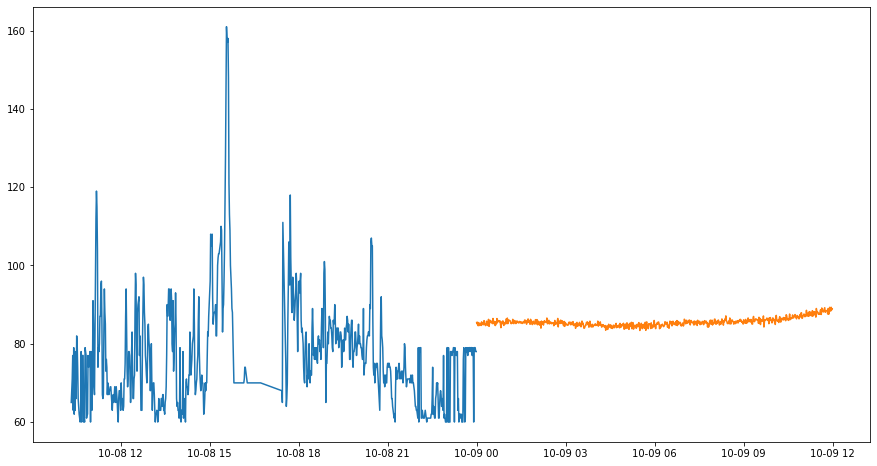

In [0]:
plt.plot(small_df, label='Train')
plt.plot(future_df.iloc[:,2], label='future')
plt.show()

**Using other datasets**

In [0]:
import pandas as pd
import numpy as np

In [0]:
subject = pd.read_excel("subject3.xlsx")
times = pd.date_range('2017-10-09', periods=subject.shape[0], freq='500ms')
subject["ds"] = times

cols = subject.columns.to_list()
cols = cols[::-1]
subject = subject[cols]

# m = Prophet()
# m.fit(subject)

# f_times = pd.date_range('2017-10-09', periods=subject.shape[0]+800, freq='500ms')
# future = pd.DataFrame({"ds": f_times[subject.shape[0]:]})

# forecast = m.predict(future)

# small_df = subject.iloc[-200:,]
# future_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# small_df = small_df.set_index("ds")
# future_df = future_df.set_index("ds")

# plt.plot(small_df, label='Train')
# plt.plot(future_df, label='future')
# plt.show()

In [0]:
subject.to_csv("subject3_edited.csv")